In [45]:
import pandas as pd
df = pd.read_csv('../dataset/imdb.zip')
df.head()

,review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=2000, stop_words='english')
m = cv.fit_transform(df.review)

In [47]:
m.shape

(1000, 2000)

In [48]:
import tensorflow as tf

In [84]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(128, input_shape=(2000,), activation='relu')) # 은닉층
model.add(tf.keras.layers.Dense(1, activation='sigmoid')) # 출력층

In [85]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 128)               256128    
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 129       
Total params: 256,257
Trainable params: 256,257
Non-trainable params: 0
_________________________________________________________________


In [86]:
2001 * 128

256128

In [87]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [88]:
result = model.fit(m.A, df['sentiment'].values, epochs=30, 
          batch_size=32, validation_split=0.2, verbose=0)

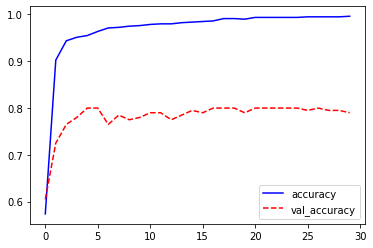

In [89]:
import matplotlib.pyplot as plt
plt.plot(result.history['accuracy'], 'b-', label='accuracy')
plt.plot(result.history['val_accuracy'], 'r--', label='val_accuracy')
plt.legend()

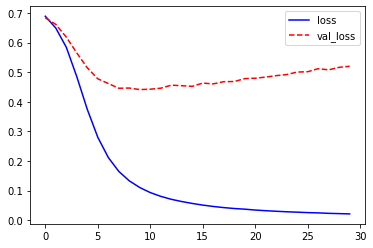

In [90]:
plt.plot(result.history['loss'], 'b-', label='loss')
plt.plot(result.history['val_loss'], 'r--', label='val_loss')
plt.legend()

In [91]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='model-{epoch:02d}', 
                                   monitor='val_loss',
                                   save_best_only=True)

In [93]:
result = model.fit(m.A, df['sentiment'].values, epochs=30, batch_size=32, 
                   validation_split=0.2, callbacks=[checkpoint])

Epoch 1/30
25/25 [==============================] - 0s 7ms/step - loss: 0.0209 - accuracy: 0.9937 - val_loss: 0.5254 - val_accuracy: 0.7950
INFO:tensorflow:Assets written to: model-01\assets
Epoch 2/30
25/25 [==============================] - 0s 10ms/step - loss: 0.0201 - accuracy: 0.9962 - val_loss: 0.5283 - val_accuracy: 0.7950
Epoch 3/30
25/25 [==============================] - 0s 8ms/step - loss: 0.0195 - accuracy: 0.9950 - val_loss: 0.5337 - val_accuracy: 0.7950
Epoch 4/30
25/25 [==============================] - 0s 7ms/step - loss: 0.0187 - accuracy: 0.9962 - val_loss: 0.5361 - val_accuracy: 0.7950
Epoch 5/30
25/25 [==============================] - 0s 7ms/step - loss: 0.0179 - accuracy: 0.9962 - val_loss: 0.5393 - val_accuracy: 0.7950
Epoch 6/30
25/25 [==============================] - 0s 11ms/step - loss: 0.0175 - accuracy: 0.9962 - val_loss: 0.5476 - val_accuracy: 0.7950
Epoch 7/30
25/25 [==============================] - 0s 6ms/step - loss: 0.0167 - accuracy: 0.9962 - val_los

In [97]:
import glob
name = sorted(glob.glob('model-*'))[-1]

In [98]:
tf.keras.models.load_model(name)